## Import các thư viện cần thiết

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os

## Tải ảnh

In [ ]:
!wget https://cs.uit.edu.vn/wp-content/uploads/2017/08/uit_dsc_0002_1-1.jpg
!wget https://cdn.cungcap.net/media/img/2019/04/15/75eR6-1555278617.png -O cslogo.png
!wget https://vn-school.s3-ap-northeast-1.amazonaws.com/school/735/truong-dai-hoc-cong-nghe-thong-tin-dhqg-hcm-uit-0-UG91FE.jpg -O logouit.jpg

In [ ]:
cv2.imwrite('original_1.jpg', cv2.imread('uit_dsc_0002_1-1.jpg'))
cv2.imwrite('original_2.png', cv2.imread('cslogo.png'))
cv2.imwrite('original_3.jpg', cv2.imread('logouit.jpg'))

True

## Hàm thuật toán PCA

In [ ]:
def PCA(X , num_components):

    # Tính giá trị trung bình của X
    X_meaned = X - np.mean(X, axis = 0)

    # Tính ma trận hiệp phương sai (covariance matrix)
    cov_mat = np.cov(X_meaned, rowvar = False)

    # Tính eigen_values và eigen_vectors từ ma trận hiệp phương sai
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

    # Sắp xếp các eigen_vectors theo thứ tự giảm dần
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    # Lấy num_components eigen_vectors đầu tiên trong list
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    # Transform tập dữ liệu X với num_components thành phần chính
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()

    # Xây dựng lại không gian ban đầu với tập dữ liệu đã transform
    PC_scores = np.dot(X_meaned, eigenvector_subset)
    result = np.dot(PC_scores, eigenvector_subset.transpose()) + np.mean(X, axis = 0)
    
    return result

## Áp dụng trên ảnh uit_dsc_0002_1-1.jpg

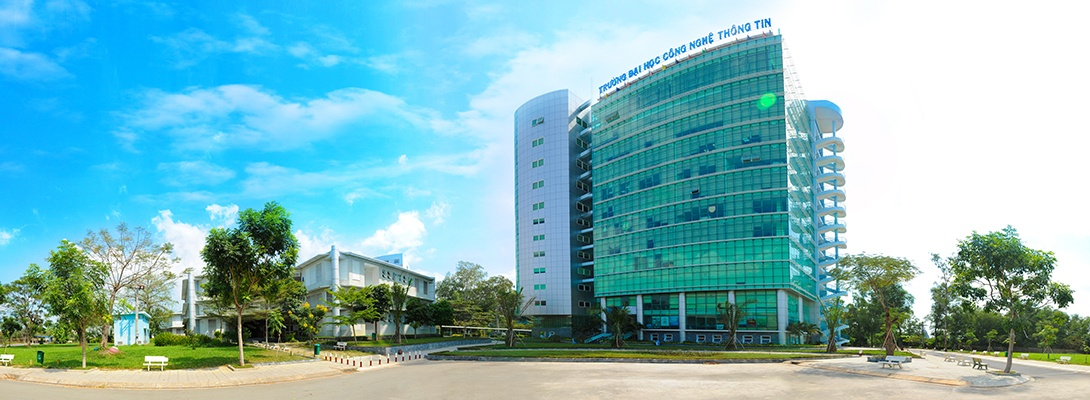

In [ ]:
img = cv2.imread('original_1.jpg')
cv2_imshow(img)

# Phân tích ảnh thành 3 kênh màu cơ bản
blue, green, red = cv2.split(img)

In [ ]:
img.shape

(400, 1090, 3)

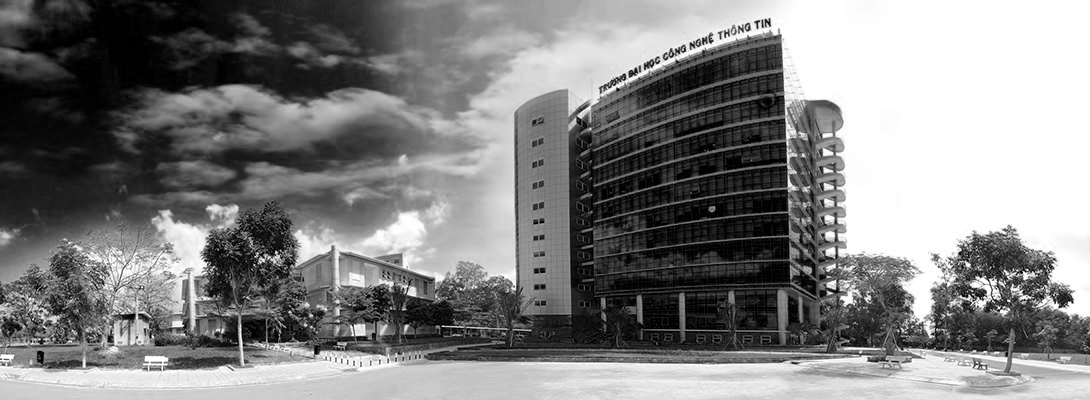

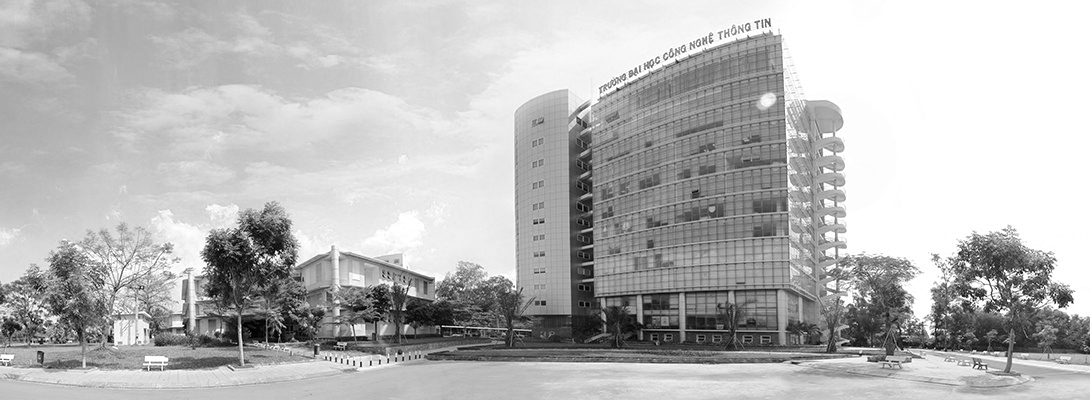

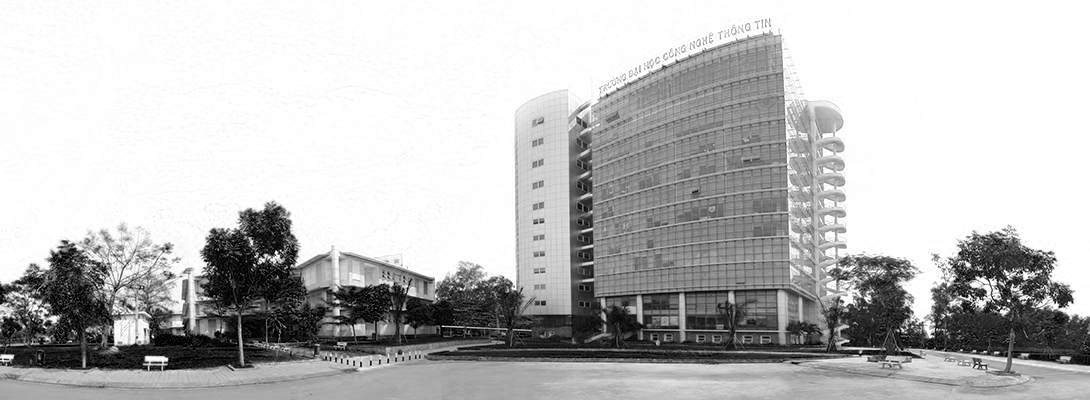

In [ ]:
cv2_imshow(red)
cv2_imshow(green)
cv2_imshow(blue)

In [ ]:
num_components = 30

# Chạy PCA trên từng kênh màu
red_transformed = PCA(red, num_components)
green_transformed = PCA(green, num_components)
blue_transformed = PCA(blue, num_components)

# Hợp nhất lại 3 kênh màu của ảnh sau khi chạy PCA
img_compressed = cv2.merge((blue_transformed, green_transformed, red_transformed))

cv2.imwrite('compressed_1.jpg', img_compressed)

True

### Kết quả

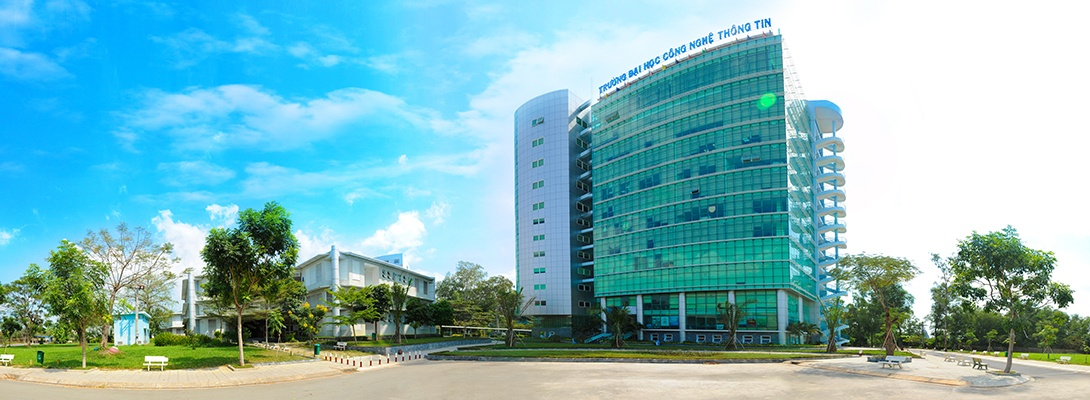

In [ ]:
cv2_imshow(img)
cv2_imshow(img_compressed)

### So sánh kích thước file ảnh gốc và ảnh nén

In [ ]:
size_original = os.path.getsize('original_1.jpg') / 1000
size_compressed = os.path.getsize('compressed_1.jpg') / 1000

print('Original:\t', size_original, 'KB')
print('Compressed:\t', size_compressed, 'KB')

Original:	 192.805 KB
Compressed:	 156.373 KB


## Áp dụng trên ảnh cslogo.png

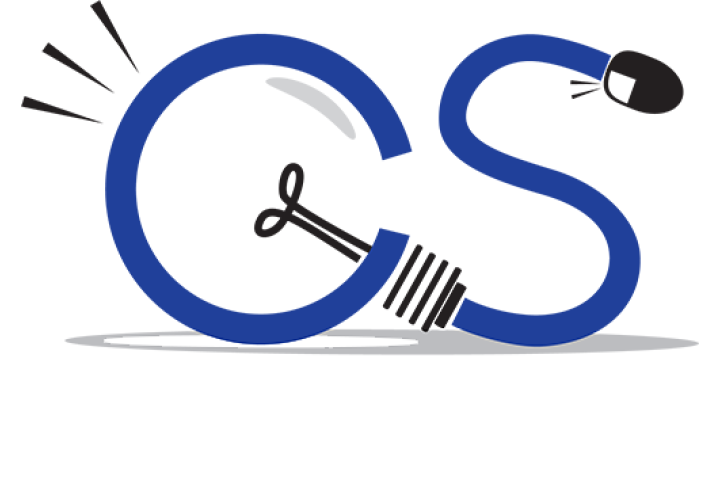

In [ ]:
img = cv2.imread('original_2.png')
cv2_imshow(img)

# Phân tích ảnh thành 3 kênh màu cơ bản
blue, green, red = cv2.split(img)

In [ ]:
num_components = 20

# Chạy PCA trên từng kênh màu
red_transformed = PCA(red, num_components)
green_transformed = PCA(green, num_components)
blue_transformed = PCA(blue, num_components)

# Hợp nhất lại 3 kênh màu của ảnh sau khi chạy PCA
img_compressed = cv2.merge((blue_transformed, green_transformed, red_transformed))

cv2.imwrite('compressed_2.png', img_compressed)

True

### Kết quả

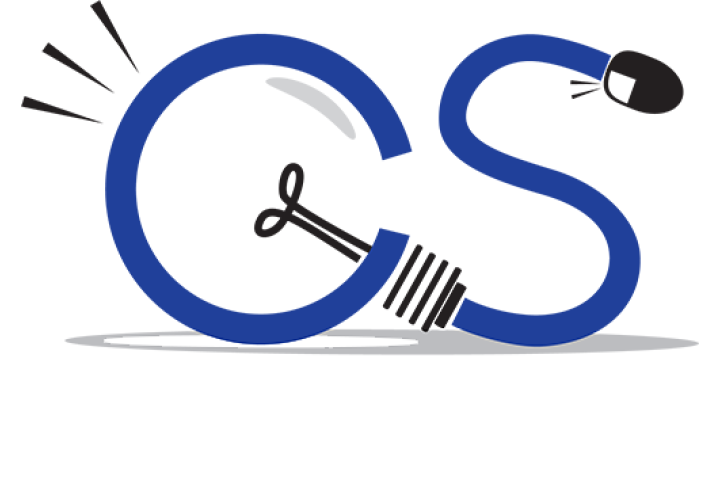

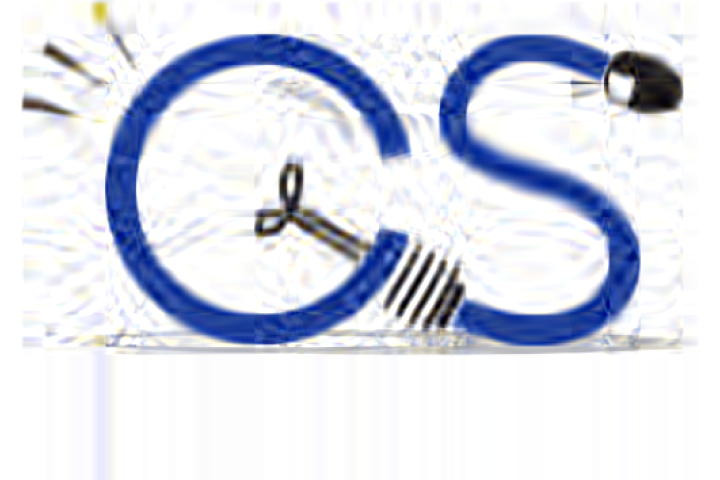

In [ ]:
cv2_imshow(img)
cv2_imshow(img_compressed)

### So sánh kích thước file ảnh gốc và ảnh nén

In [ ]:
size_original = os.path.getsize('original_2.png') / 1000
size_compressed = os.path.getsize('compressed_2.png') / 1000

print('Original:\t', size_original, 'KB')
print('Compressed:\t', size_compressed, 'KB')

Original:	 65.967 KB
Compressed:	 326.112 KB


## Áp dụng trên ảnh logouit.jpg

In [ ]:
img = cv2.imread('original_3.jpg')
cv2_imshow(img)

# Phân tích ảnh thành 3 kênh màu cơ bản
blue, green, red = cv2.split(img)

In [ ]:
num_components = 30

# Chạy PCA trên từng kênh màu
red_transformed = PCA(red, num_components)
green_transformed = PCA(green, num_components)
blue_transformed = PCA(blue, num_components)

# Hợp nhất lại 3 kênh màu của ảnh sau khi chạy PCA
img_compressed = cv2.merge((blue_transformed, green_transformed, red_transformed))

cv2.imwrite('compressed_3.jpg', img_compressed)

True

### Kết quả

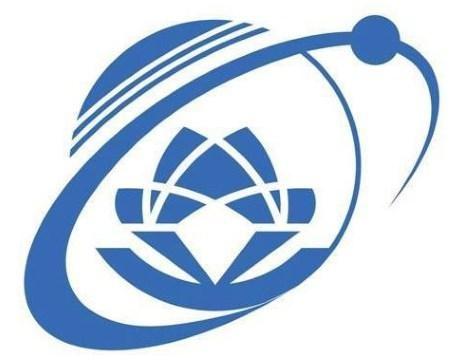

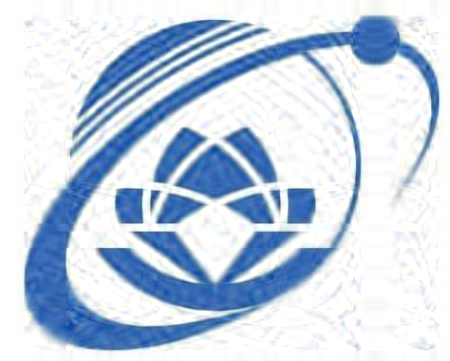

In [ ]:
cv2_imshow(img)
cv2_imshow(img_compressed)

### So sánh kích thước file ảnh gốc và ảnh nén

In [ ]:
size_original = os.path.getsize('original_3.jpg') / 1000
size_compressed = os.path.getsize('compressed_3.jpg') / 1000

print('Original:\t', size_original, 'KB')
print('Compressed:\t', size_compressed, 'KB')

Original:	 34.686 KB
Compressed:	 48.29 KB
